In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

In [45]:
X, y = datasets.make_circles(n_samples=100, shuffle=True, noise=0.04, random_state=100, factor=0.8)

In [46]:
print(np.unique(y))


[0 1]


In [47]:
y[y == 0] = -1

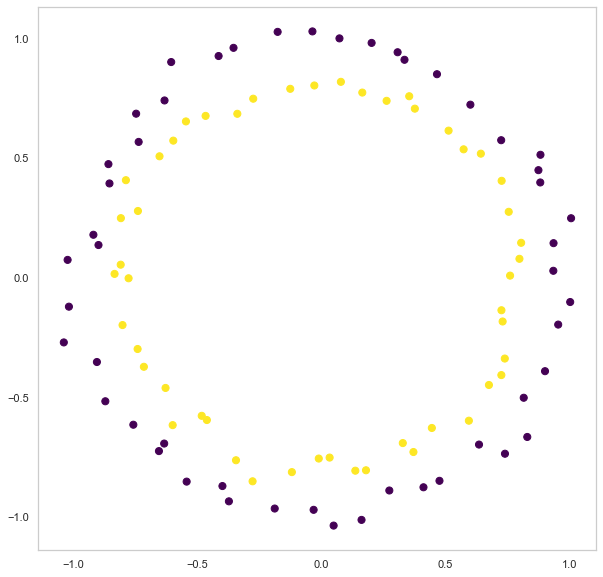

In [48]:
# Plot the data
sns.set()
sns.set_style("whitegrid")
# set figure size
plt.figure(figsize=(10, 10))
# turn grid off
plt.grid(False)
# turn scale off
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()


In [49]:
# augument 1, X[0]^2 X[1]^2 
X_aug = np.c_[np.ones(len(X)), X, X[:, 0] ** 2, X[:, 1] ** 2]

In [50]:
print(X_aug[:10])

[[ 1.00000000e+00 -3.11636534e-02 -9.70826653e-01  9.71173294e-04
   9.42504390e-01]
 [ 1.00000000e+00  7.88966484e-02  8.17529577e-01  6.22468113e-03
   6.68354609e-01]
 [ 1.00000000e+00 -1.01876430e+00 -1.21954030e-01  1.03788070e+00
   1.48727855e-02]
 [ 1.00000000e+00  4.12228872e-01 -8.76590205e-01  1.69932643e-01
   7.68410388e-01]
 [ 1.00000000e+00 -3.73087450e-01 -9.35326594e-01  1.39194246e-01
   8.74835837e-01]
 [ 1.00000000e+00 -1.02406631e+00  7.35191007e-02  1.04871180e+00
   5.40505816e-03]
 [ 1.00000000e+00 -1.88179010e-01 -9.65437315e-01  3.54113396e-02
   9.32069209e-01]
 [ 1.00000000e+00 -5.43639171e-01 -8.52978821e-01  2.95543549e-01
   7.27572869e-01]
 [ 1.00000000e+00 -8.02396644e-01 -1.98762580e-01  6.43840374e-01
   3.95065630e-02]
 [ 1.00000000e+00 -8.59319072e-01  4.73717566e-01  7.38429268e-01
   2.24408333e-01]]


In [51]:
def perceptron(X, y, w_init=None, eta=0.1, epochs=1000):
    """
    Perceptron learning algorithm.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target vector relative to X.
    eta : float
        Learning rate (between 0.0 and 1.0)
    epochs : int
        Passes over the training dataset.

    Returns
    -------
    w : array-like, shape = [n_features + 1]
        Weights after fitting.
    errors : list
        Number of misclassifications in every epoch.

    """
    if w_init is None:
        w = np.zeros(X.shape[1])
    else:
        w = w_init

    errors = []
    weights = []
    for epoch in range(epochs):
        e = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * y[i]) <= 0:
                w = w + eta * X[i] * y[i]
                e += 1
        errors.append(e)
        weights.append(w)
        if epoch % 10 == 0:
            print("epoch: ", epoch, "error: ", e)
        if e == 0:
            break
    print("epoch: ", epoch, "error: ", e)
    return weights, errors

In [52]:
weights, errors = perceptron(X_aug, y, eta=0.1, epochs=1000)

epoch:  0 error:  38
epoch:  10 error:  8
epoch:  20 error:  1
epoch:  21 error:  0


In [53]:
print(weights)

[array([ 0.2       , -0.01067936, -0.07701589, -0.18019416, -0.23955288]), array([ 0.2       ,  0.07873329, -0.05532681, -0.40071887, -0.42499002]), array([ 3.00000000e-01, -5.27623010e-04, -9.75425622e-02, -5.52898038e-01,
       -4.78371046e-01]), array([ 0.4       ,  0.05127322, -0.01712136, -0.63035932, -0.55734609]), array([ 0.4       ,  0.03708264,  0.02804134, -0.63677981, -0.61654469]), array([ 0.5       ,  0.03847499,  0.04830935, -0.58808159, -0.67270881]), array([ 0.5       ,  0.03983704,  0.00455862, -0.69234095, -0.71555202]), array([ 0.5       ,  0.11228914,  0.06437572, -0.75827913, -0.76493075]), array([ 0.5       ,  0.03744875,  0.02451381, -0.80313494, -0.78581656]), array([ 0.6       , -0.00829038,  0.01507814, -0.80545004, -0.77447998]), array([ 0.6       , -0.06519494, -0.02617262, -0.8000447 , -0.84421192]), array([ 0.6       , -0.03515027,  0.07545921, -0.85274847, -0.85224692]), array([ 0.7       ,  0.06027931,  0.05060034, -0.81480848, -0.86576597]), array([ 0.

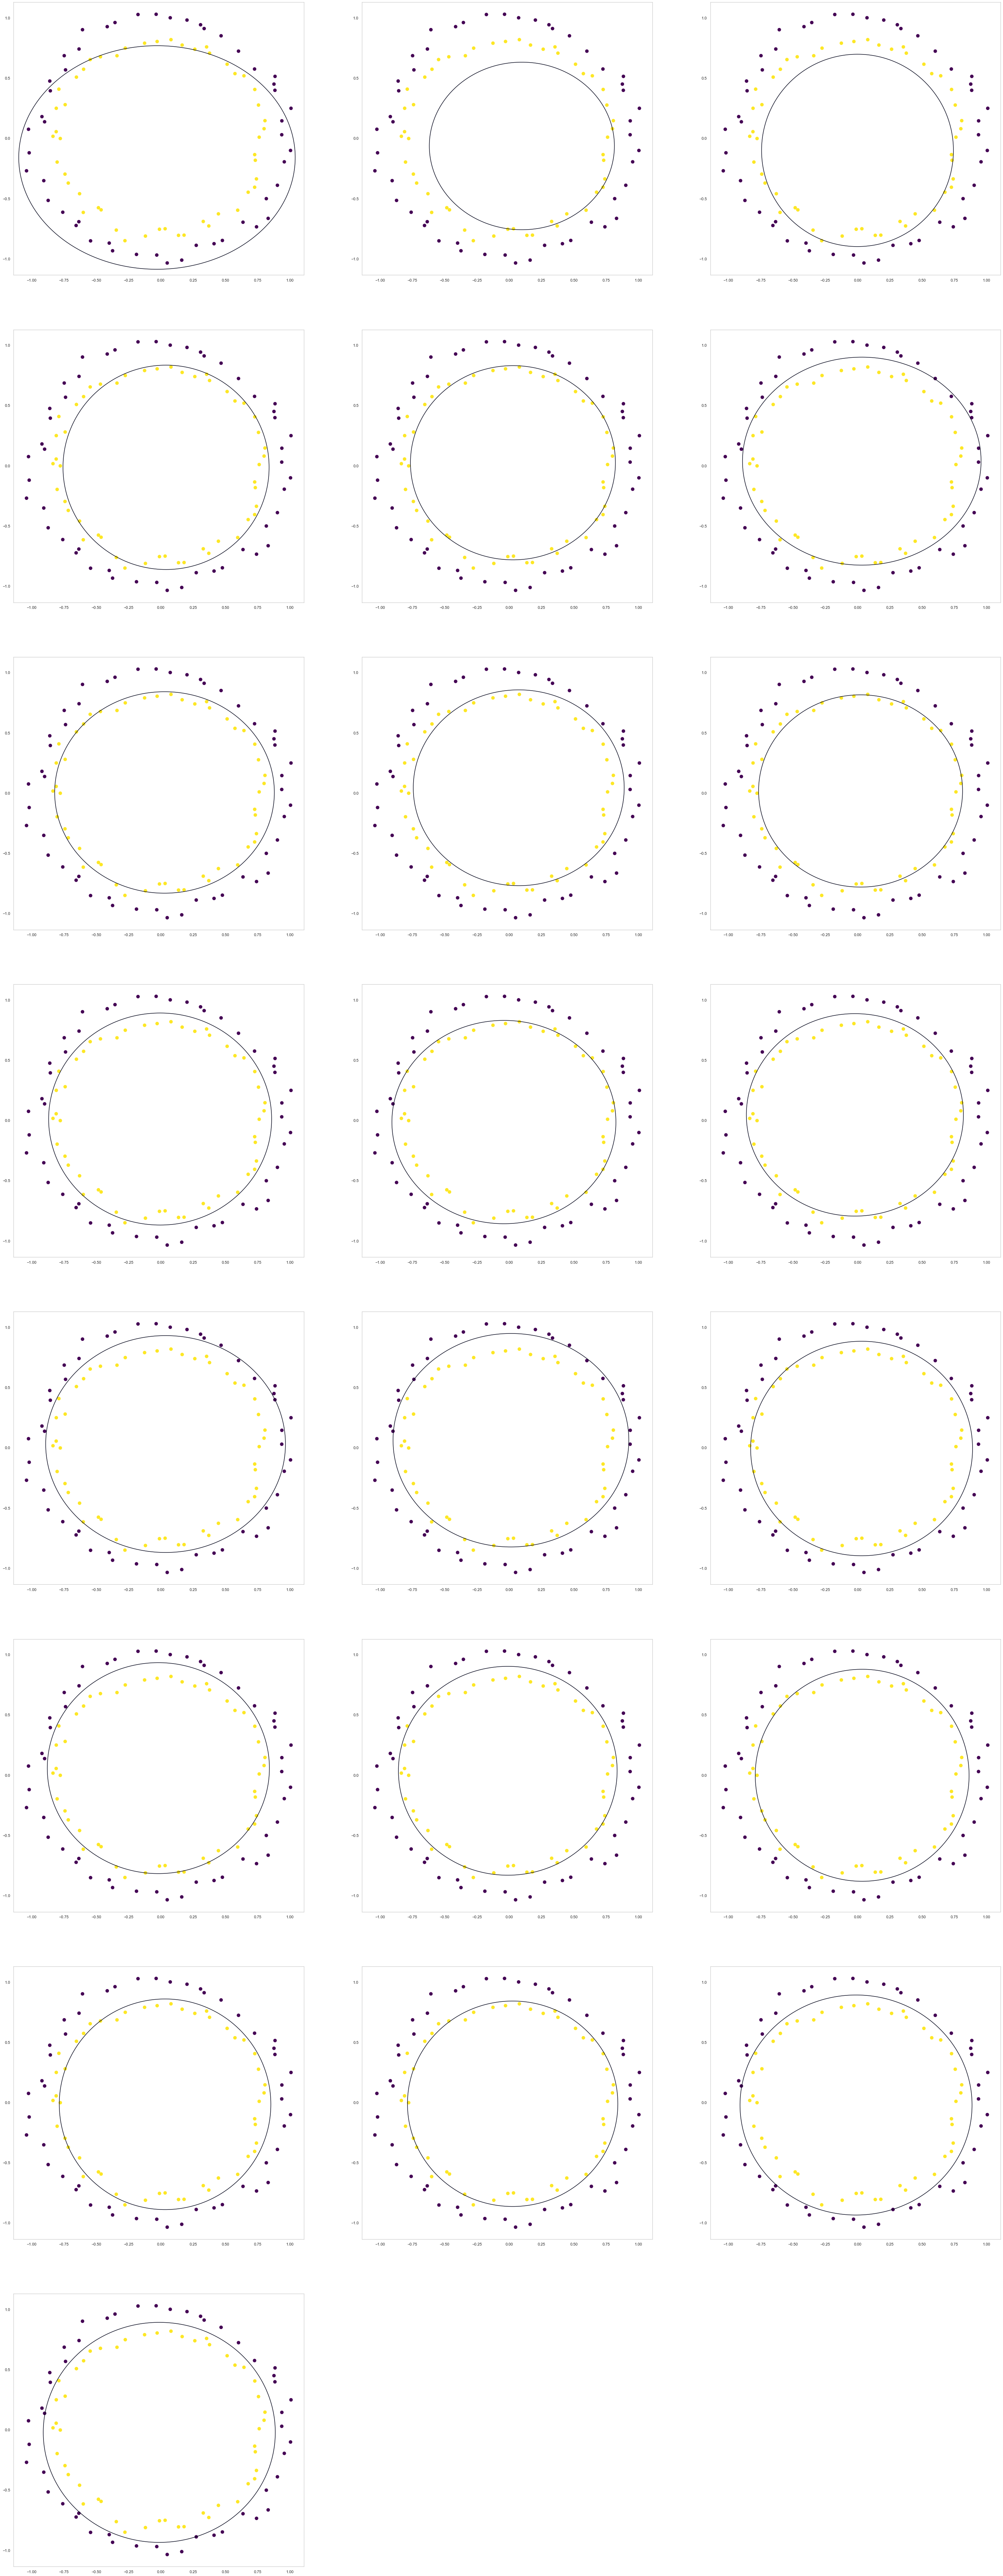

In [54]:
# using the weights to plot the decision boundary
columns = 3
rows = len(weights) // columns + 1
Xs = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
Ys = np.linspace(X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1, 100)
Xs, Ys = np.meshgrid(Xs, Ys)
fig, ax = plt.subplots(rows, columns, figsize=(50, 50*rows/columns))
for i in range(len(weights)):
    w = weights[i]
    Zs = (-w[0] - w[1] * Xs - w[2] * Ys - w[3] * Xs ** 2 - w[4] * Ys ** 2)
    ax[i//columns, i%columns].contour(Xs, Ys, Zs, levels=[0])
    # plt the data
    ax[i//columns, i%columns].scatter(X[:, 0], X[:, 1], c=y, s=80, cmap='viridis')
    # turn grid off
    ax[i//columns, i%columns].grid(False)
   

# remove the empty subplots
for i in range(rows):
    for j in range(columns):
        if ax[i, j].has_data() == False:
            ax[i, j].axis('off')



In [55]:

# creating each plot and saving it
import os
import shutil
path = os.path.join(os.getcwd(), 'plots-03')
if not os.path.exists(path):
    os.makedirs(path)
# remove the old plots from plot folder
for filename in os.listdir('plots-03'):
    file_path = os.path.join('plots-03', filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))
# save the plots
for i in range(len(weights)):
    w = weights[i]
    fig = plt.figure(figsize=(20, 27))
    Zs = (-w[0] - w[1] * Xs - w[2] * Ys - w[3] * Xs ** 2 - w[4] * Ys ** 2)
    ax0 = plt.subplot2grid((4, 1), (0, 0), rowspan=3, colspan=2)
    ax0.contour(Xs, Ys, Zs, levels=[0], colors='b')
    # plt the data
    ax0.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='viridis')
    # turn grid off
    ax0.grid(False)
    ax0.text(0.1, 0.1, str(i), fontsize=50, horizontalalignment='center', verticalalignment='center', transform=ax0.transAxes)
    ax0.set_yticklabels([])
    ax0.set_xticklabels([])
 

    ax1 = plt.subplot2grid((4, 1), (3, 0))
    ax1.set_xlim(0, len(errors))
    ax1.set_ylim(0, max(errors))
    ax1.plot(errors[:i+1])
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('error')
    ax1.grid(False)
    ax1.axis('off')
    ax1.text(0.4, 0.6, 'loss: %.2f' % errors[i], fontsize=20,
             horizontalalignment='center', verticalalignment='center',
             transform=ax1.transAxes)
   


    filename = os.path.join(path, str(i) + '.png')
    plt.savefig(filename)
    plt.savefig(filename, dpi=100)
    # clear the plot
    plt.clf()
    plt.close()
    


In [56]:
# delete the old perceptron.gif
for filename in os.listdir('.'):
    if filename == 'secondOrder.gif':
        os.remove(filename)


# create a gif from the plots
import imageio
images = []
filenames = [filename for filename in os.listdir('plots-03')]
# sort the filenames based on the iteration number
filenames.sort(key=lambda x: int(x.split('.')[0]))
for filename in filenames:
    images.append(imageio.imread(os.path.join('plots-03', filename)))


imageio.mimsave('secondOrder.gif', images, duration=0.5)




In [57]:
# show the gif
import matplotlib.animation as animation
from IPython.display import HTML


# display the gif

HTML('<img src="{}">'.format('secondOrder.gif'))
